Hola **Milton**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<span style='color:brown'>
    
# PROYECTO SPRINT 14 - SERIES TEMPORALES
    
</span>

<span style='color:darkblue'>
    
## DESCRIPCIÓN DEL PROYECTO

</span>


La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.


---

<span style='color:brown'>
    
### Instrucciones del proyecto.

</span>


1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.



---

<span style='color:brown'>
    

### Descripción de los datos

</span>




Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

---

---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección introductoria ya que ayuda a entender el que y cómo de tu proyecto antes de revisar cada celda, te animo a mantener esta buena práctica!
</div>

<span style='color:darkblue'>
    
## PREPARACIÓN DE LOS DATOS
    
</span>

---

<span style='color:brown'>
    
### Librerías del Proyecto

</span>

In [1]:
# Primeramente importamos todas las librerías que necesitaremos para este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings


<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

---

<span style='color:brown'>
    
### Cargamos y Examinamos los Datos

</span>

In [2]:
# Examinamos las primeras filas y la información general del dataset
df = pd.read_csv('datasets/taxi.csv')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [3]:
# Obtenemos la información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

* Podemos ver inicialmente que el dataset consta de dos columnas, la primera que contiene datos de fecha y hora.

    
* La segunda columna incluye datos de la cantidad vehículos que ha sido solicitada en el intervalo de tiempo de 10 minutos.



In [4]:
missing_values = df.isna().sum()
duplicated_values = df.duplicated().sum()

print(f'- Cantidad de Valores Ausentes: \n{missing_values}\n\n- Cantidad de Valores Duplicados: {duplicated_values}')

- Cantidad de Valores Ausentes: 
datetime      0
num_orders    0
dtype: int64

- Cantidad de Valores Duplicados: 0


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

* Se puede apreciar que el dataset del proyecto **no tiene valores ausentes en ninguna de las dos columnas**.

    
* Se ha podido constantar también que **no existen valores duplicados en el dataset del proyecto**.


A continuación como no existen valores nulos ni duplicados voy a proceder a realizar la puesta enformado de la columna `datetime` al formato datetime64[ns].


In [5]:
# Convertimos la columna 'datetime' a formato de fecha y hora
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [6]:
# Establezco 'datetime' como índice del DataFrame
df.set_index('datetime', inplace=True)

# Seguidamente realizo un ordenado de la columna índice "datetime"
df = df.sort_index()
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


---


<span style='color:brown'>
    
### Remuestreado de los Datos de la Hora

</span>

In [7]:
# Ahora procedo a remuestrear los datos en intervalos de una hora, sumando los valores de 'num_orders'
hourly_data = df.resample('1H').sum()

# Examino nuevamente los datos remuestreados
hourly_data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [8]:
# Ahora veo un resumen general de los datos de las columnas
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [9]:
# Ahora presento un resumen estadístico nuevamente
hourly_data.describe() 


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


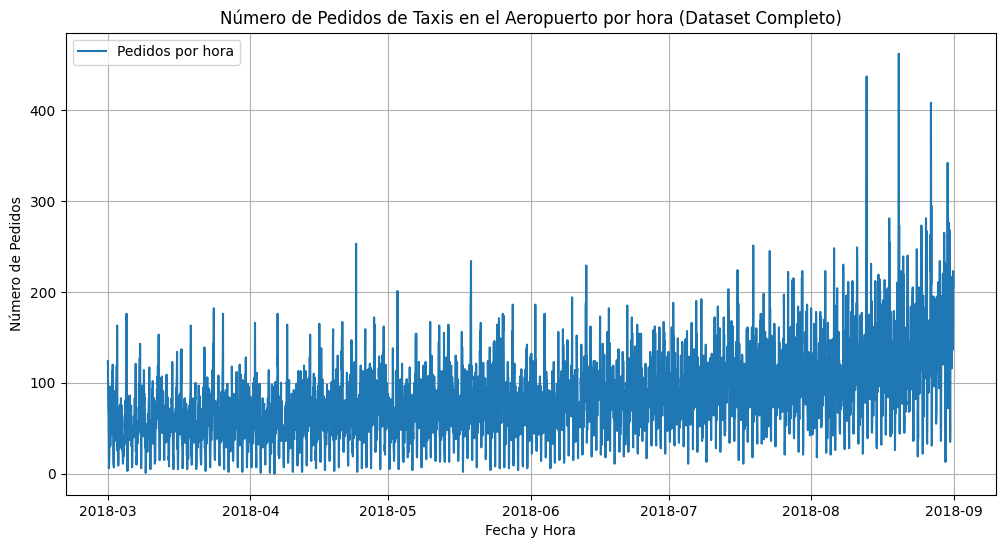

In [10]:
# Visualización de la serie temporal completa
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['num_orders'], label='Pedidos por hora')
plt.title('Número de Pedidos de Taxis en el Aeropuerto por hora (Dataset Completo)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.grid()
plt.show()

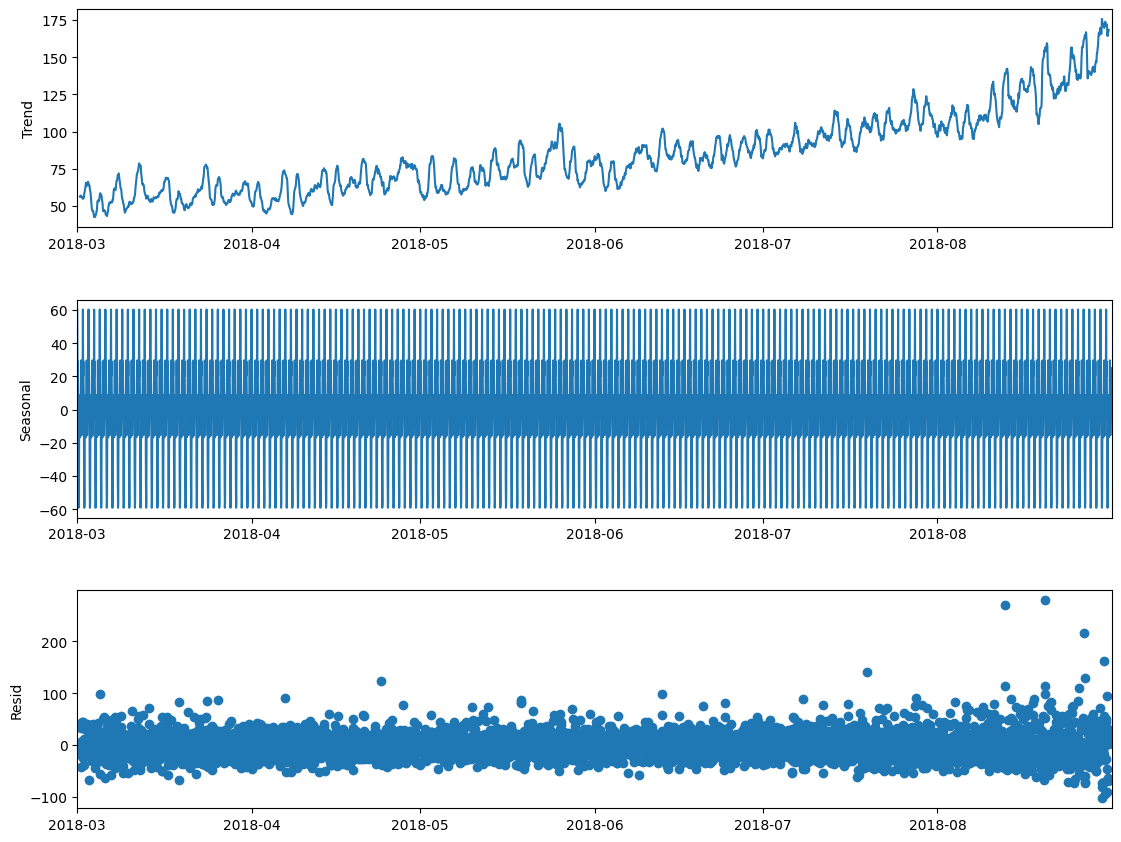

In [11]:
# Descomposición de la serie temporal (aditiva)
decomposition = seasonal_decompose(hourly_data['num_orders'], model='additive', period=24)
fig = decomposition.plot(observed=False)
fig.set_size_inches(12, 9)
plt.show()


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

* Se ha realizado la **puesta en formato de la columna `datetime`** y posteriormente se ha convertido esta columna en el índice del dataset del proyecto, para un mejor manejo de la información.

    
* Cómo los intervalos de tiempo eran de 10 minutos se ha procedido a realizar el **remuestreado a un nuevo intervalo de una hora**, sumándose todos los datos contenidos dentro de una hora.

    
* Se ha elaborado una **gráfica de la serie temporal completa**, la cual muestra las fluctuaciones en el número de pedidos de taxis a lo largo del tiempo. Se ha podido apreciar variaciones significativas en algunos puntos.

    
* Se ha elaborado otra **gráfica de Descomposición Estacional**, la cual muestra:

    * **Tendencia**: Existe un cambio lento a lo largo del tiempo, probablemente debido a factores de largo plazo.
      
    * **Estacionalidad**: Un patrón recurrente diario, que confirma fluctuaciones aparentemente previsibles a lo largo del día.
 
    * **Ruido**: Variaciones aleatorias que no siguen un patrón claro.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, realizaste las gráficas correctas para el análisis de datos temporales
</div>

---

---

<span style='color:darkblue'>

## ANÁLISIS DE LOS DATOS
    
</span>

---

<span style='color:brown'>
    
### Distribución del Número de Pedidos por Hora

</span>

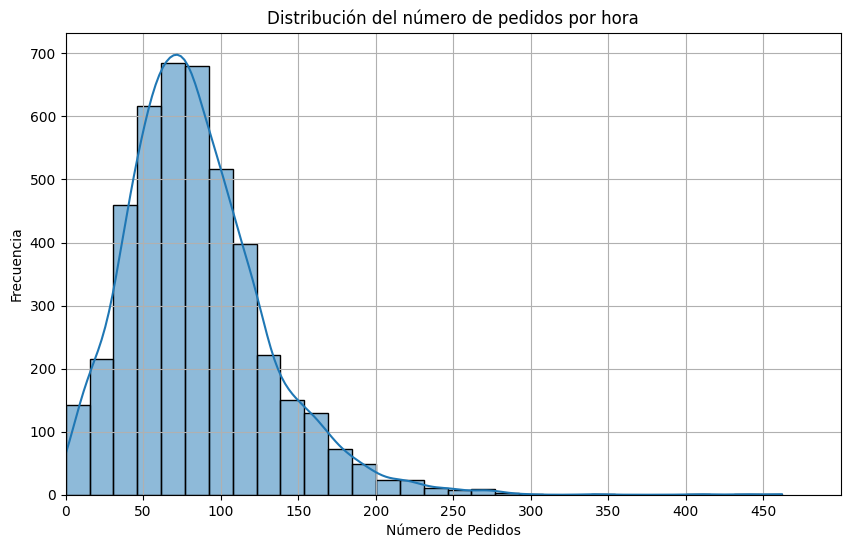

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [12]:
# Analizo la distribución del número de pedidos por hora
plt.figure(figsize=(10, 6))
sns.histplot(hourly_data['num_orders'], bins=30, kde=True)
plt.title('Distribución del número de pedidos por hora')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frecuencia')
plt.xlim((0, 500))
plt.xticks(np.arange(0,500, 50))
plt.grid()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Distribución del número de pedidos por Hora:**

* La mayoría de los valores se concentran **entre 50 y 90 pedidos por hora**, con algunas horas excepcionales superando los 400 pedidos.

</div>

---

<span style='color:brown'>
    
### Patrones Diarios en el Número de Pedidos

</span>

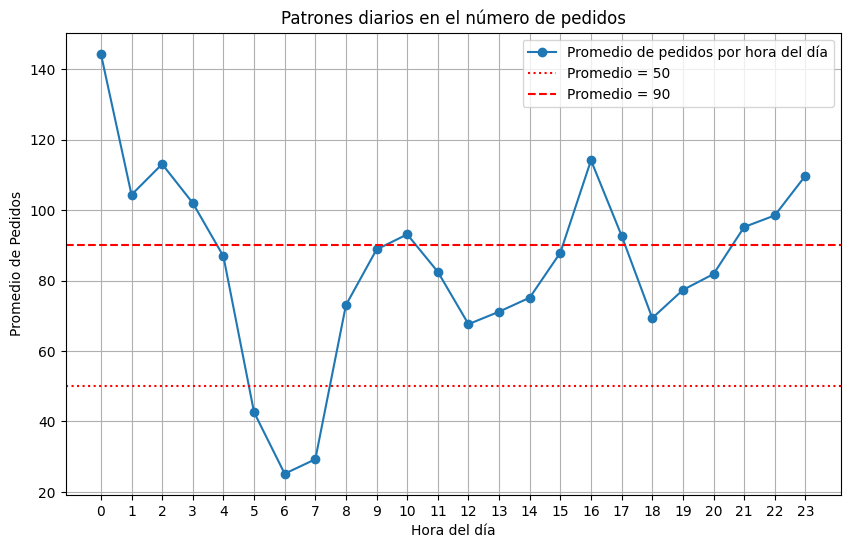

hour
0     144.402174
1     104.364130
2     113.070652
3     102.021739
4      86.907609
5      42.630435
6      25.173913
7      29.271739
8      73.048913
9      88.831522
10     93.119565
11     82.489130
12     67.630435
13     71.173913
14     75.163043
15     87.945652
16    114.146739
17     92.722826
18     69.358696
19     77.336957
20     81.858696
21     95.211957
22     98.500000
23    109.766304
Name: num_orders, dtype: float64

In [13]:
# Ahora busco identificar patrones diarios (agrupación por hora del día)
hourly_data['hour'] = hourly_data.index.hour
hourly_pattern = hourly_data.groupby('hour')['num_orders'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', label='Promedio de pedidos por hora del día')

# Añado líneas horizontales en 50 y 90 que es el rango donde se concentran más los datos
plt.axhline(y=50, color='red', linestyle=':', label='Promedio = 50')
plt.axhline(y=90, color='red', linestyle='--', label='Promedio = 90')

plt.title('Patrones diarios en el número de pedidos')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de Pedidos')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

hourly_pattern

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Patrones diarios**:

Los pedidos aumentan significativamente durante ciertas horas del día, probablemente en horarios pico como las mañanas y las tardes.

 * El **promedio máximo de pedidos se encuentra entre las `00:00 a 03:00` y luego de `16:00 a 17:00`**.

    
 * El **promedio más bajo de pedidos se encuentra entre las `05:00` hasta las `07:00` de la mañana**.

    
 * El resto de los rangos de hora se encuentran en promedio con un comportamiento casi normal o habital que oscila entre 50 a 90 pedidos.

</div>

---

<span style='color:brown'>
    
### Distribución de Pedidos por Hora del Día

</span>

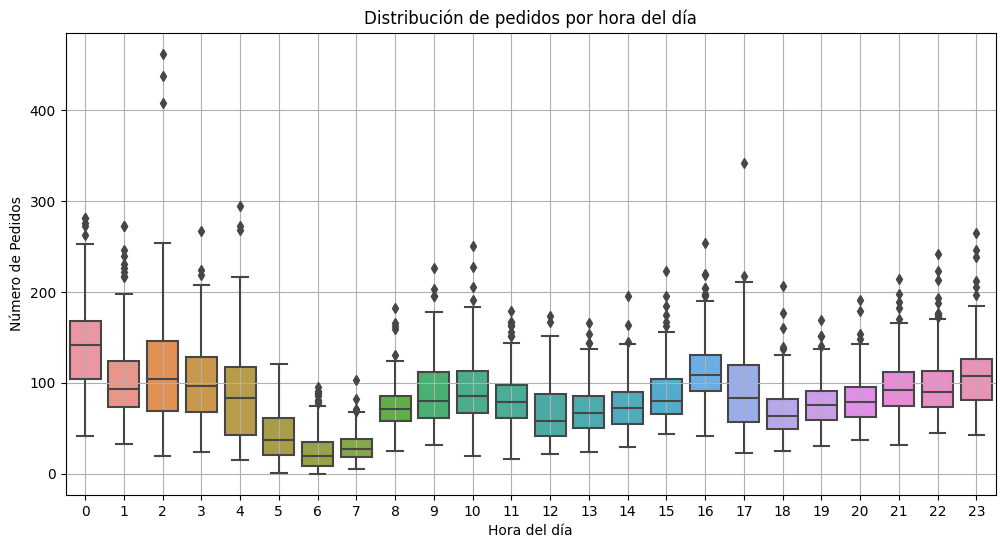

,num_orders,hour
datetime,,
2018-03-01 00:00:00,124,0
2018-03-01 01:00:00,85,1
2018-03-01 02:00:00,71,2
2018-03-01 03:00:00,66,3
2018-03-01 04:00:00,43,4
...,...,...
2018-08-31 19:00:00,136,19
2018-08-31 20:00:00,154,20
2018-08-31 21:00:00,159,21


In [14]:
# Análisis de distribución: Boxplot por hora del día
plt.figure(figsize=(12, 6))
sns.boxplot(x=hourly_data['hour'], y=hourly_data['num_orders'])
plt.title('Distribución de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de Pedidos')
plt.grid()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Distribución por hora del día:**

 * El boxplot concuerda con el plot del punto anterior, sin embargo este boxplot nos ayuda a poder observar que existen una mayor variabilidad y un número significativamente mayor de pedidos, respecto al plot del punto anterior.

</div>

---

<span style='color:brown'>
    
### Patrones Semanales en el Número de Pedidos

</span>

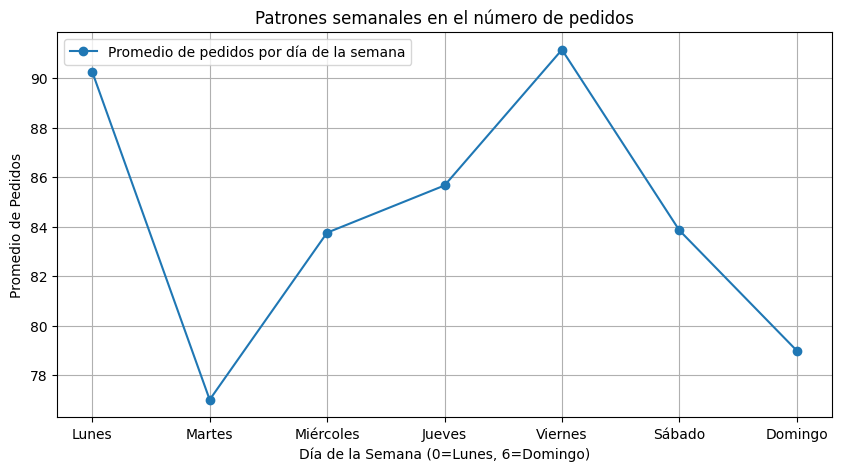

,num_orders,hour,day_of_week
datetime,,,
2018-03-01 00:00:00,124,0,3
2018-03-01 01:00:00,85,1,3
2018-03-01 02:00:00,71,2,3
2018-03-01 03:00:00,66,3,3
2018-03-01 04:00:00,43,4,3
...,...,...,...
2018-08-31 19:00:00,136,19,4
2018-08-31 20:00:00,154,20,4
2018-08-31 21:00:00,159,21,4


In [15]:
# También quiero Identificar patrones semanales (agrupación por día de la semana)
hourly_data['day_of_week'] = hourly_data.index.dayofweek
weekly_pattern = hourly_data.groupby('day_of_week')['num_orders'].mean()

plt.figure(figsize=(10, 5))
plt.plot(weekly_pattern.index, weekly_pattern.values, marker='o', label='Promedio de pedidos por día de la semana')
plt.title('Patrones semanales en el número de pedidos')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Promedio de Pedidos')
plt.xticks(range(0, 7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.legend()
plt.grid()
plt.show()

hourly_data

In [16]:
weekly_pattern

day_of_week
0    90.246795
1    77.011218
2    83.754808
3    85.660494
4    91.140432
5    83.847756
6    78.991987
Name: num_orders, dtype: float64

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Patrones semanales:**

 * Los **días Lunes y Viernes tienen más pedidos en promedio**.
 
    
 * Los **días Miércoles, Jueves y Sábado son los días que tienen un comportamiento de los pedidos más habitual** en promedio.
 
    
 * Los **días Martes y Domingo son los días con la menor cantidad de pedidos en promedio**.

</div>

---

<span style='color:brown'>
    
### Tendencia de Largo Plazo en el Número de Pedidos

</span>

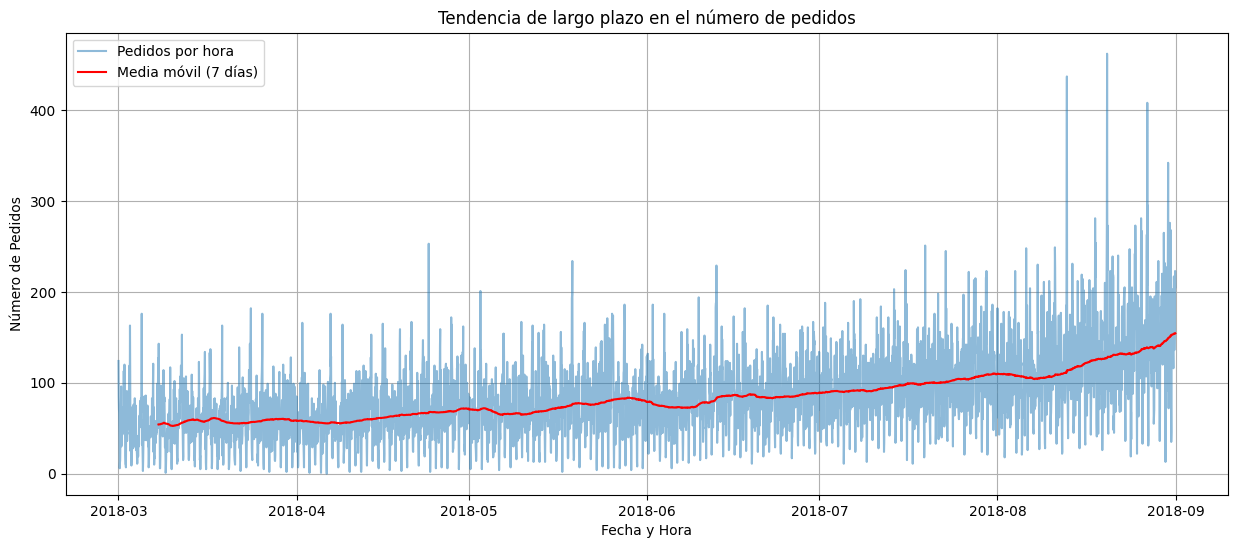

,num_orders,hour,day_of_week,rolling_mean_7d
datetime,,,,
2018-03-01 00:00:00,124,0,3,NaN
2018-03-01 01:00:00,85,1,3,NaN
2018-03-01 02:00:00,71,2,3,NaN
2018-03-01 03:00:00,66,3,3,NaN
2018-03-01 04:00:00,43,4,3,NaN
...,...,...,...,...
2018-08-31 19:00:00,136,19,4,154.434524
2018-08-31 20:00:00,154,20,4,154.285714
2018-08-31 21:00:00,159,21,4,154.244048


In [17]:
# Tendencias de largo plazo: Media móvil con ventana de 7 días (7 x 24 = 168 horas)
hourly_data['rolling_mean_7d'] = hourly_data['num_orders'].rolling(window=168).mean()

plt.figure(figsize=(15, 6))
plt.plot(hourly_data['num_orders'], label='Pedidos por hora', alpha=0.5)
plt.plot(hourly_data['rolling_mean_7d'], color='red', label='Media móvil (7 días)')
plt.title('Tendencia de largo plazo en el número de pedidos')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.grid()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Tendencia de largo plazo:**

 * La gráfica con la **media móvil de 7 días muestra una tendencia suavizada en los pedidos que va progresivamente en aumento**, permitiendo observar cambios estructurales a lo largo del tiempo.

</div>

---
    

<span style='color:brown'>
    
### Detección de Outliers - Distribución General

</span>

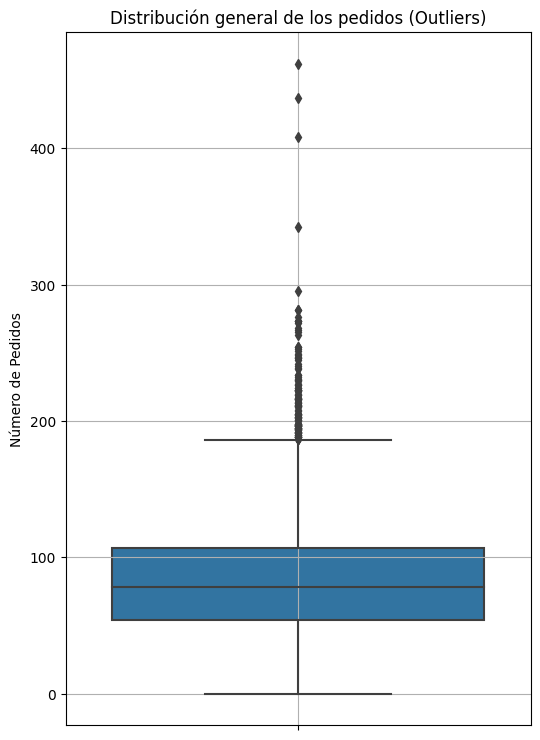

,num_orders,hour,day_of_week
datetime,,,
2018-03-01 00:00:00,124,0,3
2018-03-01 01:00:00,85,1,3
2018-03-01 02:00:00,71,2,3
2018-03-01 03:00:00,66,3,3
2018-03-01 04:00:00,43,4,3
...,...,...,...
2018-08-31 19:00:00,136,19,4
2018-08-31 20:00:00,154,20,4
2018-08-31 21:00:00,159,21,4


In [18]:
# ----------------------------------------------------------------------------------------
# Inicialmente borro la columna "rolling_mean_7d", creada en el apartado anterior
hourly_data.drop(labels='rolling_mean_7d', axis=1, inplace=True)
# ----------------------------------------------------------------------------------------

# Detección de outliers: Distribución general
plt.figure(figsize=(6, 9))
sns.boxplot(y=hourly_data['num_orders'])
plt.title('Distribución general de los pedidos (Outliers)')
plt.ylabel('Número de Pedidos')
plt.grid()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Detección de outliers:**

Se visualizaron outliers en la distribución general de los pedidos, **habiéndose identificado horas con una cantidad inusualmente alta de demanda.**

</div>

---
    

<span style='color:brown'>
    
### Distribución de Outliers por Día de la Semana

</span>

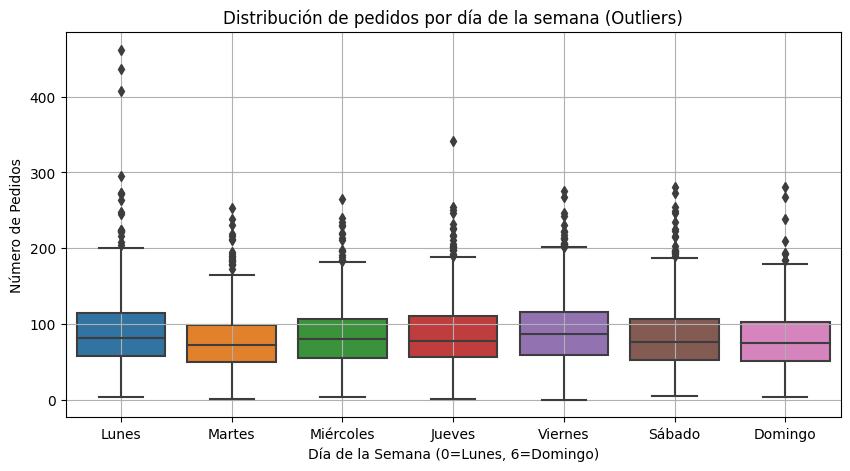

,num_orders,hour,day_of_week
datetime,,,
2018-03-01 00:00:00,124,0,3
2018-03-01 01:00:00,85,1,3
2018-03-01 02:00:00,71,2,3
2018-03-01 03:00:00,66,3,3
2018-03-01 04:00:00,43,4,3
...,...,...,...
2018-08-31 19:00:00,136,19,4
2018-08-31 20:00:00,154,20,4
2018-08-31 21:00:00,159,21,4


In [19]:
# Creo una columna 'day_of_week' para el día de la semana
hourly_data['day_of_week'] = hourly_data.index.dayofweek

# Visualización de los  outliers de la distribución de pedidos por cada día de la semana
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_week', y='num_orders', data=hourly_data)
plt.title('Distribución de pedidos por día de la semana (Outliers)')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Número de Pedidos')
plt.xticks(range(0, 7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Lunes y Jueves**:

 * **Hay más outliers superiores**, lo que indica horas con demanda excepcionalmente alta de taxis, posiblemente durante horas pico (mañanas o tardes).


**Martes, Miércoles, Viernes, Sábado y Domingo:**

 * La **distribución es menos variable** comparada con los días laborales.

 * Los outliers también existen, pero **son menos frecuentes y menos extremos**.

</div>

---

<span style='color:brown'>
    
### Tendencia Mensual en el Número de Pedidos

</span>

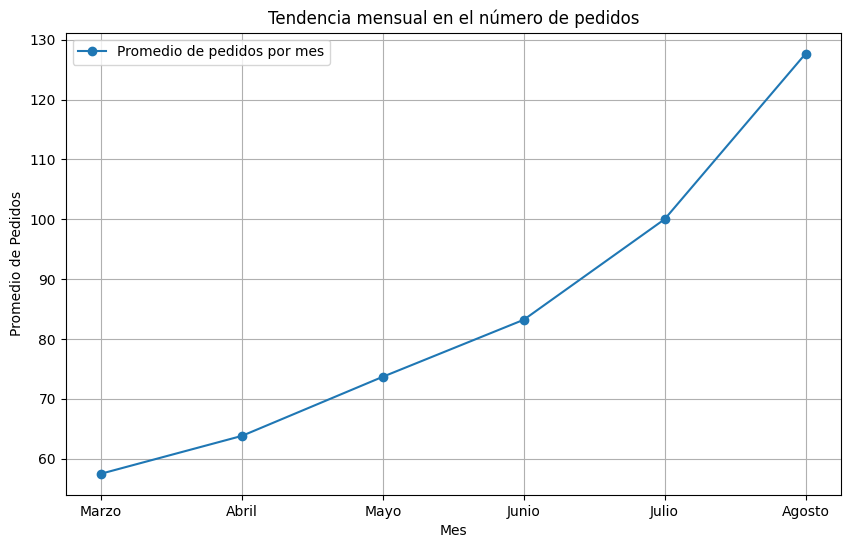

month
3     57.483871
4     63.804167
5     73.682796
6     83.202778
7    100.006720
8    127.651882
Name: num_orders, dtype: float64

In [20]:
# Crear una columna para identificar el mes en los datos
hourly_data['month'] = hourly_data.index.month

# Visualizar la tendencia de los pedidos promediados por mes
monthly_trends = hourly_data.groupby('month')['num_orders'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', label='Promedio de pedidos por mes')
plt.title('Tendencia mensual en el número de pedidos')
plt.xlabel('Mes')
plt.ylabel('Promedio de Pedidos')
plt.xticks(range(3, 9), [
    'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto'])
plt.legend()
plt.grid()
plt.show()

monthly_trends

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**Variación estacional:**

 * Se aprecia que algunos meses tienen una mayor demanda promedio de taxis.

 * Los meses con un promedio más bajo pueden coincidir con períodos de menor actividad, como vacaciones o estacionalidad natural.


**Picos y descensos:**

 * Los meses con mayor promedio podrían deberse a eventos específicos o patrones estacionales (por ejemplo, invierno o verano, dependiendo de la región).

**Comportamiento en el Tiempo:**

 * Se puede apreciar que en promedio la cantidad en el número de pedidos de taxis desde el aeropuerto ha ido incrementando en cada mes.
   
</div>

---
    

<span style='color:brown'>
    
### Autocorrelación y Autocorrelación Parcial 

</span>

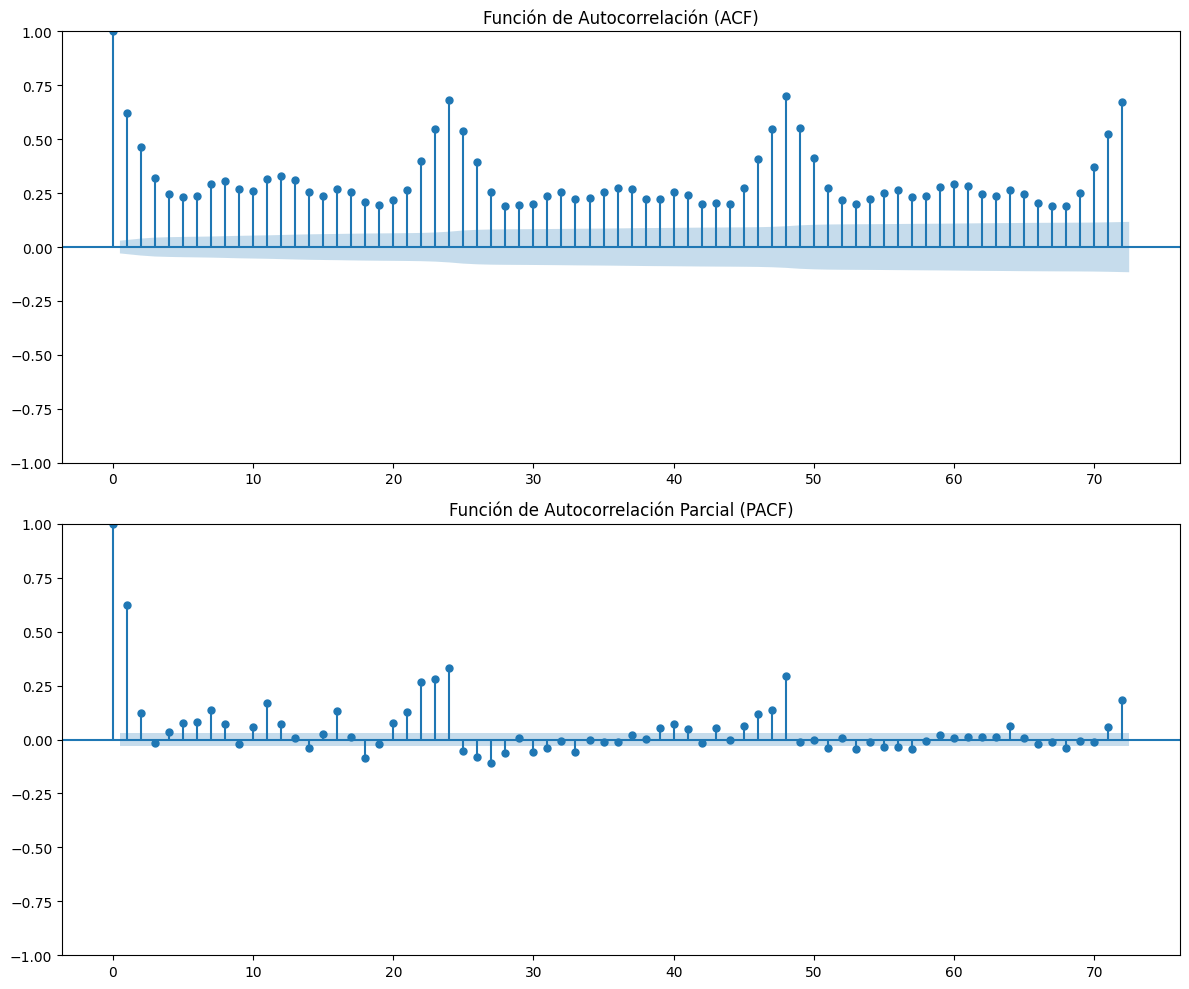

,num_orders,hour,day_of_week,month
datetime,,,,
2018-03-01 00:00:00,124,0,3,3
2018-03-01 01:00:00,85,1,3,3
2018-03-01 02:00:00,71,2,3,3
2018-03-01 03:00:00,66,3,3,3
2018-03-01 04:00:00,43,4,3,3
...,...,...,...,...
2018-08-31 19:00:00,136,19,4,8
2018-08-31 20:00:00,154,20,4,8
2018-08-31 21:00:00,159,21,4,8


In [21]:
# Correlación temporal: ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(hourly_data['num_orders'], lags=72, ax=ax[0])
plot_pacf(hourly_data['num_orders'], lags=72, ax=ax[1])
ax[0].set_title('Función de Autocorrelación (ACF)')
ax[1].set_title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

hourly_data

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

**ACF y PACF:**

* La `Función de Autocorrelación (ACF)` confirma una **fuerte correlación entre la cantidad de pedidos actuales y las horas previas**.

    
* La `Función de Autocorrelación Parcial (PACF)` sugiere que **el número de pedidos depende directamente de las horas más recientes** (*autoregresión directa*).

</div>

---
    

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado en el EDA, realizaste un análisis muy detallado de cada variable en tu dataset para conocer a fondo los datos a utilizar, esto es un paso súper importante en proyectos de este tipo ya que la calidad de los datos está directamente relacionada con la calidad de predicción de los modelos.
</div>

---

---

<span style='color:darkblue'>

## SEPARACIÓN DE LOS DATOS Y ENTRENAMIENTO DE LOS MODELOS
    
</span>


---

<span style='color:brown'>
    
### Creación de las Columnas Lags

</span>

In [22]:
# Creo 24 lags (valores anteriores de pedidos), debido a que con 3 los valores RMSE son mayores a 48.
for i in range(1, 25):
    hourly_data[f'lag_{i}'] = hourly_data['num_orders'].shift(i)
    
# Elimino filas con NaN generadas por los lags
hourly_data_ml = hourly_data.dropna()

hourly_data_ml

,num_orders,hour,day_of_week,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,0,4,3,58.0,113.0,66.0,61.0,45.0,73.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0
2018-03-02 01:00:00,120,1,4,3,90.0,58.0,113.0,66.0,61.0,45.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0
2018-03-02 02:00:00,75,2,4,3,120.0,90.0,58.0,113.0,66.0,61.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0
2018-03-02 03:00:00,64,3,4,3,75.0,120.0,90.0,58.0,113.0,66.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0
2018-03-02 04:00:00,20,4,4,3,64.0,75.0,120.0,90.0,58.0,113.0,...,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,19,4,8,207.0,217.0,197.0,116.0,133.0,166.0,...,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,72.0
2018-08-31 20:00:00,154,20,4,8,136.0,207.0,217.0,197.0,116.0,133.0,...,78.0,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0
2018-08-31 21:00:00,159,21,4,8,154.0,136.0,207.0,217.0,197.0,116.0,...,35.0,78.0,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---
    
<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
    
* Se han creado lags extendidos  con intervaloes desde 1, hasta 24 horas. Esto **debido a que en las primeras corridas de mi entranimento de los modelos seleccionados no he alcanzado un RMSE menor que 48**, como lo solicita el proyecto.

    
* Se han eliminado las filas con valores nulos, producidos por la creación de las columnas `lag_1`, hasta `lag_24`.

</div>

---
    
</div>

---

<span style='color:brown'>
    
### Separación de Características y Variables Objetivo

</span>

In [23]:
# Creo Variables independientes (X) y dependiente (y)
features = [f'lag_{i}' for i in range(1, 25)] + ['hour', 'day_of_week', 'month']

X = hourly_data_ml[features]
y = hourly_data_ml['num_orders']

print('-'*150)
print(f'Dimensiones del dataset de Características: {X.shape} \t-\tDimensiones del Series de la Variable Objetivo {y.shape}')
print('-'*150)


------------------------------------------------------------------------------------------------------------------------------------------------------
Dimensiones del dataset de Características: (4392, 27) 	-	Dimensiones del Series de la Variable Objetivo (4392,)
------------------------------------------------------------------------------------------------------------------------------------------------------


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

En este apartado del proyecto hemos creado los siguientes datasets:



<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>

 * Dataset de **Características** con dimensiones (4392, 27).
 
    
 * Dataset de la **Variable Objetivo** con dimensiones (4392, ).

</div>

---

</div>

---

---

<span style='color:brown'>

### División de los Datos (90% - 10%)

</span>

In [24]:
# Dividimos los datos en entrenamiento (90%), prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=12345)

# ---------------------------------------------------------------------------------------------------------------------------------
# Confirmamos los tamaños de las divisiones de los datos realizadas
print("="*120)
print("DIMENSIONES DE LOS DATASETS DEL PROYECTO")
print("-"*120)
print(f'Conjunto de Entrenamiento: {X_train.shape}')
print(f'Conjunto de Prueba: {X_test.shape}')
print("="*120)


DIMENSIONES DE LOS DATASETS DEL PROYECTO
------------------------------------------------------------------------------------------------------------------------
Conjunto de Entrenamiento: (3952, 27)
Conjunto de Prueba: (440, 27)


---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         

La división de los conjuntos de datos para este proyecto, ha sido realizada de la siguiente manera:
    
 * **Conjunto de Entrenamiento**: Se ha asignado un `90%`, para ajustar el modelo y aprender patrones a partir de los datos. Teniendo un total de 3952 filas y 27 columnas.
    
    
 *  **Conjunto de Prueba**: Se ha asignado el restante `10%`, para evaluar la calidad del modelo final en datos no vistos. Habiendose configurado este dataset con 440 filas y 27 columnas.

</div>

---

</div>

---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, dividiste los datos en los sets necesarios y extraíste características extra para darle más información al modelo, esto es un paso importante para asegurar un correcto desempeño
</div>

---

<span style='color:brown'>

### Entrenamiento de los Modelos de Machine Learning

</span>

In [25]:
# Parámetros para GridSearchCV
param_grids = {
    'LinearRegression': {},
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 20]
    },
    'LGBMRegressor': {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [-1, 10, 20, 30]
    },
    'CatBoostRegressor': {
        'iterations': [200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'depth': [4, 6, 8, 10]
    }
}


In [26]:
# Inicializamos los modelos
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=12345, n_jobs=-1),
    'LGBMRegressor': LGBMRegressor(random_state=12345, verbose=-1, n_jobs=-1),
    'CatBoostRegressor': CatBoostRegressor(verbose=0, random_state=12345, thread_count=-1)
}

# Voy a silenciar todos los mensajes de futuras advertencias que me han salido en LightGBMRegressor
warnings.filterwarnings("ignore", category=FutureWarning) 


In [27]:
# Optimización de hiperparámetros con GridSearchCV y evaluación del Conjunto de Entrenamiento
cv_results = {}
best_params = {}

for model_name, model in models.items():
    print(f"\nOptimizando {model_name} en el conjunto de entrenamiento...")
    param_grid = param_grids[model_name]

    # GridSearchCV para ajustar hiperparámetros
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Mejor modelo encontrado
    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    # Validación cruzada en el conjunto de entrenamiento, debido a la poca cantidad de datos del dataset
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse_cv = -np.mean(scores)
    cv_results[model_name] = mean_rmse_cv

    print(f"    - Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"    - RMSE medio en validación cruzada (entrenamiento): {mean_rmse_cv:.2f}")



Optimizando LinearRegression en el conjunto de entrenamiento...
    - Mejores hiperparámetros: {}
    - RMSE medio en validación cruzada (entrenamiento): 25.79

Optimizando RandomForestRegressor en el conjunto de entrenamiento...
    - Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 400}
    - RMSE medio en validación cruzada (entrenamiento): 23.80

Optimizando LGBMRegressor en el conjunto de entrenamiento...
    - Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
    - RMSE medio en validación cruzada (entrenamiento): 23.00

Optimizando CatBoostRegressor en el conjunto de entrenamiento...
    - Mejores hiperparámetros: {'depth': 6, 'iterations': 500, 'learning_rate': 0.05}
    - RMSE medio en validación cruzada (entrenamiento): 22.73


In [28]:
# Mostrar resultados de validación cruzada
print("\nResultados de RMSE en el conjunto de entrenamiento (validación cruzada):")
cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=['Cross-Validation RMSE'])
cv_df = cv_df.sort_values(by='Cross-Validation RMSE', ascending=False)
cv_df



Resultados de RMSE en el conjunto de entrenamiento (validación cruzada):


,Cross-Validation RMSE
LinearRegression,25.786935
RandomForestRegressor,23.795001
LGBMRegressor,23.002367
CatBoostRegressor,22.729936


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente Milton! Realizaste un procesamiento de los datos de manera correcto y entrenaste los modelos usando las mejores técnicas, esto se ve reflejado en los resultados obtenidos con una métrica muy por debajo de lo requerido
</div>

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>
                         
(**Comentarios del Alumno - Milton Valle**)
    
---

<div style='background-color:rgba(60, 180, 90, 0.45); padding:30px;'><span style='color:darkblue'>

**ANALISIS DE LOS PARÁMETROS ÓPTIMOS**

**LinearRegression**

 * **Hiperparámetros:** No ajustables (modelo predeterminado). 

    
 * **Descripción:** Linear Regression no tiene hiperparámetros ajustables en Scikit-learn, ya que asume una relación lineal entre las variables independientes (features) y la variable objetivo (num_orders).

---

**RandomForestRegressor**

 * **Hiperparámetros:**
    
    * `max_depth=20`: Permite que los árboles crezcan hasta su máxima profundidad. Esto asegura que no se limite la capacidad predictiva de cada árbol.

    * `min_samples_split=5`: Especifica que una división interna no ocurre a menos que haya al menos 5 muestras. Esto ayuda a evitar sobreajuste al reducir divisiones innecesarias.

    * `n_estimators=400`: Número de árboles en el bosque. Más árboles tienden a mejorar la precisión, pero aumentan el tiempo de entrenamiento.


 * **Descripción:**

    * Random Forest es un modelo de ensamble que combina múltiples árboles de decisión para mejorar la precisión y robustez.

    * Los parámetros seleccionados equilibran la capacidad del modelo (profundidad máxima ilimitada) con regularización (min_samples_split=5) para evitar sobreajuste.

---


**LightGBMRegressor**

* **Hiperparámetros:**
    
    * `learning_rate=0.05`: Tasa de aprendizaje. Controla la contribución de cada árbol en el modelo final. Un valor de 0.05 es un estándar equilibrado.

    * `max_depth=-10`: Indica que los árboles no tienen una profundidad máxima establecida, permitiendo un ajuste más flexible a los datos.

    * `n_estimators=200`: Número de árboles de decisión en el modelo. Un valor moderado asegura buen rendimiento sin exceso de tiempo de entrenamiento.


 * **Descripción:**

    * LightGBM es un modelo de Gradient Boosting optimizado para grandes volúmenes de datos. Utiliza algoritmos eficientes y particiones por hoja en lugar de nivel.
    
    * La combinación de `learning_rate` y `n_estimators` balancea precisión y tiempo de entrenamiento.

---


**CatBoostRegressor**

* **Hiperparámetros:**
    
    * `depth=6`: Profundidad de los árboles. Un valor bajo indica árboles simples que generalizan bien sin sobreajuste.
    
    * `iterations=500`:  Número total de árboles en el ensamble. Controla la capacidad predictiva y el tiempo de entrenamiento.
    
    * `learning_rate=0.05`: Tasa de aprendizaje que equilibra la contribución incremental de cada árbol.


 * **Descripción:**

    * CatBoost es un modelo de Gradient Boosting eficiente y especializado en manejar datos categóricos, aunque en nuestro caso los datos ya están numerizados.
    
    * La configuración encontrada refleja un buen compromiso entre complejidad y capacidad generalizadora.



</div>

---

<div style='background-color:rgba(12, 120, 210, 0.3); padding:30px;'><span style='color:darkblue'>


**ANALISIS DE LOS RESULTADOS OBTENIDOS - RMSE de Entrenamiento**

**LinearRegression**:

 *La RMSE obtenida de 25.79 sugiere que el modelo no es suficientemente flexible para capturar la complejidad y no linealidad de los datos.


**RandomForestRegressor:**

 * La RMSE obtenida es de 23.80 (Conjunto de Entrenamiento).


**LightGBMRegressor:**

 * La RMSE obtenida es de 23.00 (Conjunto de Entrenamiento).


**CatBoostRegressor:**

 * La RMSE obtenida es de 22.73 (Conjunto de Entrenamiento).

 
   
</div>

---

<div style='background-color:rgba(210, 30, 90, 0.30); padding:30px;'><span style='color:darkred'>
    
**CONCLUSIÓN DEL ANÁLISIS** 

 * **LinearRegression**: Es el modelo menos efectivo debido a su simplicidad. No logra capturar la no linealidad de los datos.


 * **RandomForestRegressor**: Muestra un buen rendimiento con `n_estimators=400` y regularización moderada (`min_samples_split=5`).


 * **LightGBMRegressor**: Es el **segundo mejor modelo en términos de RMSE del conjunto de entrenamiento (23.00)**. Su eficiencia y flexibilidad lo hacen ideal para los datos.


 * **CatBoostRegressor**: Ha logrado el mejor resultado en terminos de RMSE de Entrenamiento, obteniendo un RMSE de 22.73. Ha tenido un rendimiento bastante competitivo con una configuración compacta (árboles de profundidad baja).


</div>

---

</div>

---

---

<span style='color:darkblue'>

## IMPLEMENTACIÓN DE LOS AJUSTES ÓPTIMOS (Conjunto de Prueba)
    
</span>


---

<span style='color:brown'>

### Entrenamiento de los Modelos con el Conjunto de Prueba

</span>

In [31]:
test_results = {}

for model_name, params in best_params.items():
    print(f"\nEvaluando  '{model_name}'  en el Conjunto de Prueba con los mejores hiperparámetros...")

    # Inicializamos el modelo con los mejores hiperparámetros
    if model_name == 'LinearRegression':
        model = LinearRegression()
    elif model_name == 'RandomForestRegressor':
        model = RandomForestRegressor(**params, random_state=12345, n_jobs=-1)
    elif model_name == 'LGBMRegressor':
        model = LGBMRegressor(**params, random_state=12345, verbose=-1, n_jobs=-1)
    elif model_name == 'CatBoostRegressor':
        model = CatBoostRegressor(**params, verbose=0, random_state=12345, thread_count=-1)

    # Entrenamos el modelo con el conjunto de entrenamiento completo
    model.fit(X_train, y_train)

    # Evaluamos el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    test_results[model_name] = rmse_test
    print(f"    - RMSE en el Conjunto de Prueba: {rmse_test:.2f}")
    


Evaluando  'LinearRegression'  en el Conjunto de Prueba con los mejores hiperparámetros...
    - RMSE en el Conjunto de Prueba: 45.71

Evaluando  'RandomForestRegressor'  en el Conjunto de Prueba con los mejores hiperparámetros...
    - RMSE en el Conjunto de Prueba: 43.04

Evaluando  'LGBMRegressor'  en el Conjunto de Prueba con los mejores hiperparámetros...
    - RMSE en el Conjunto de Prueba: 39.99

Evaluando  'CatBoostRegressor'  en el Conjunto de Prueba con los mejores hiperparámetros...
    - RMSE en el Conjunto de Prueba: 40.88


---

<span style='color:brown'>

### Resultados RMSE Obtenidos por Modelo

</span>

In [35]:
# Mostrar resultados finales en el conjunto de prueba
print('-'*120)
print("Resultados finales de RMSE en el Conjunto de Prueba:")
print('-'*120)
test_df = pd.DataFrame.from_dict(test_results, orient='index', columns=['Test RMSE'])
test_df = test_df.sort_values(by='Test RMSE')
print(test_df)


------------------------------------------------------------------------------------------------------------------------
Resultados finales de RMSE en el Conjunto de Prueba:
------------------------------------------------------------------------------------------------------------------------
                       Test RMSE
LGBMRegressor          39.991489
CatBoostRegressor      40.883240
RandomForestRegressor  43.035788
LinearRegression       45.712620


---

<span style='color:brown'>

### Ajuste Óptimo de Hiperparámetros

</span>

In [36]:
print()
print('-'*120)
print("Resumen de mejores hiperparámetros por modelo:")
print('-'*120)
for model, params in best_params.items():
    print(f"{model}: {params}")
    


------------------------------------------------------------------------------------------------------------------------
Resumen de mejores hiperparámetros por modelo:
------------------------------------------------------------------------------------------------------------------------
LinearRegression: {}
RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 400}
LGBMRegressor: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
CatBoostRegressor: {'depth': 6, 'iterations': 500, 'learning_rate': 0.05}


---

---

---

<span style='color:darkblue'>

## RESUMEN Y GENERALIDADES  DEL PROYECTO
    
</span>

---

<span style='color:brown'>

### Introducción

</span>

---

<div style='background-color:rgba(240, 240, 240, 0.9); padding:30px;'> 

El presente informe detalla el proceso completo llevado a cabo para desarrollar un modelo de predicción de la cantidad de pedidos de taxis en intervalos de una hora. El objetivo principal fue minimizar el error cuadrático medio raíz (RMSE) en el conjunto de prueba, utilizando diversos modelos de regresión y optimización de hiperparámetros. 

Se trabajó con un conjunto de datos que contiene características temporales de series de tiempo, como la hora del día, el día de la semana y valores retrasados (lags) de la variable objetivo. A través de un enfoque sistemático, se seleccionaron y optimizaron los siguientes modelos:

1. **Linear Regression**
   

2. **RandomForestRegressor**


3. **LGBMRegressor**


4. **CatBoostRegressor**

</div>

---

<span style='color:brown'>

### Resultados de los Modelos

</span>

---

<div style='background-color:rgba(150, 150, 150, 0.45); padding:30px;'> 


A continuación, se presentan los resultados finales del RMSE obtenido en el conjunto de prueba, junto con los hiperparámetros óptimos identificados durante la búsqueda con **`GridSearchCV`**:

| Modelo                  | Test RMSE   | Hiperparámetros Óptimos                                  |
|-------------------------|-------------|---------------------------------------------------------|
| **LGBMRegressor**       | **39.99**   | {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200} |
| **CatBoostRegressor**   | 40.88       | {'depth': 6, 'iterations': 500, 'learning_rate': 0.05}       |
| **RandomForestRegressor** | 43.04     | {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 400} |
| **LinearRegression**    | 45.71       | {}                                                      |

</div>

---

<span style='color:brown'>

###  Observaciones

</span>

---

<div style='background-color:rgba(240, 240, 240, 0.9); padding:30px;'> 

- El **LGBMRegressor** mostró el mejor rendimiento con un **RMSE de 39.99**, lo que lo posiciona como el modelo más preciso para este conjunto de datos.


- El **CatBoostRegressor** siguió de cerca con un RMSE de 40.88, demostrando ser competitivo con un mayor número de iteraciones.


- El **RandomForestRegressor** tuvo un rendimiento sólido, aunque ligeramente inferior, con un RMSE de 43.04.


- La **LinearRegression** mostró el RMSE más alto (45.71), confirmando que un enfoque lineal no captura la complejidad de los datos.

</div>

---

<span style='color:brown'>

### Pasos Principales del Proyecto


</span>

---

<div style='background-color:rgba(240, 240, 240, 0.99); padding:30px;'> 


1. **<span style='color:blue'>Cargar y Preparar los Datos</span>**:
   - Los datos fueron remuestreados a intervalos de una hora.
     
   - Se crearon características adicionales como `hour`, `day_of_week`, y valores retrasados (`lag_1`, `lag_2`, ..., `lag_24`) para capturar dependencias temporales.
  
---
     
2. **<span style='color:blue'>División del Conjunto de Datos**</span>:
   - Los datos se dividieron en **90% para entrenamiento** y **10% para prueba**, respetando la naturaleza temporal.

---

     
3. **<span style='color:blue'>Optimización de Hiperparámetros</span>**:
   - Se utilizó **GridSearchCV** para explorar combinaciones de hiperparámetros en un espacio amplio.
     
   - La validación cruzada con **k-fold (cv=5)** permitió evaluar de manera robusta el rendimiento de los modelos.

---

4. **<span style='color:blue'>Evaluación en el Conjunto de Prueba</span>**:
   - Los mejores hiperparámetros identificados se aplicaron a cada modelo.
     
   - Se calculó el **RMSE final** en el conjunto de prueba.


</div>

---

<span style='color:brown'>

### Conclusiones Finales


</span>

---

<div style='background-color:rgba(240, 240, 240, 0.99); padding:30px;'> 

1. **LGBMRegressor** fue el modelo con mejor rendimiento, logrando un **RMSE de 39.99** en el conjunto de prueba. Esto demuestra la capacidad del modelo para manejar características complejas y dependencias temporales.


2. **CatBoostRegressor** y **RandomForestRegressor** también demostraron ser opciones sólidas, con un rendimiento cercano al LGBM.


3. La **LinearRegression** no resultó adecuada para este problema, debido a su incapacidad para modelar patrones no lineales en los datos.
   
</div>

---

<span style='color:brown'>

### Reflexión Final


</span>

---

<div style='background-color:rgba(240, 240, 240, 0.99); padding:30px;'> 

El éxito del modelo LGBMRegressor resalta la importancia de:

- **Optimización de hiperparámetros**: Explorar diferentes combinaciones con GridSearchCV permitió ajustar el modelo de manera precisa.


- **Features de series temporales**: La incorporación de **lags** y características temporales mejoró significativamente el rendimiento.


- **Validación robusta**: La validación cruzada evitó el sobreajuste y proporcionó una evaluación confiable del modelo.

</div>

---

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Milton, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto,
    
Además debo resaltar la forma tan detallada en cómo presentas y explicas los resultados, esto demuestra tu conocimiento en los algortimos y métricas usadas para la evaluación de los mismos, continúa con este gran trabajo!
</div>

# Lista de revisión

- [x] Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x] Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48